In [39]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram


IBMQ.save_account('ad3965ae3913db06521d71bba9e1208319b91a9e7ab869744cd624d63a8e898cfef58312e0819dcc2a1a2ffa59a867a4fdf5f6e225c6f2c80f28e03d3bb1a61a',overwrite=True)

#IBMQ.save_account('ebadbf7da56bb61d559a2f5fecd3d1d6e60d13ce5dd374f801829f3c92cd864b124e1ad5c1fd3faa6a14a5365f9d326947df8db138604049b06192da43d6a49b',overwrite=True)

#IBMQ.save_account('676f27667e5b533a92387a7716d67080d9648d217e96873f767e3834c2861bd4590a7ffbff31002cbce3f215642436c9a2e3a731e24b797ed5acd92765a463c2',overwrite=True)
#IBMQ.save_account('ebadbf7da56bb61d559a2f5fecd3d1d6e60d13ce5dd374f801829f3c92cd864b124e1ad5c1fd3faa6a14a5365f9d326947df8db138604049b06192da43d6a49b',overwrite=True)



IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends() 

ibmqfactory.load_account:WARNING:2020-08-09 18:19:41,544: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [40]:
from qiskit import *

In [41]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

In [42]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [43]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)


n=5
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
    
circuit = QuantumCircuit(qr, cr)
barriers = True


            # Apply Hadamard gate
circuit.h(qr)    
    

            # Apply Z-gate 
circuit.z(qr)  

            # Apply barrier 


            # Apply Hadamard gate
circuit.h(qr) 

            # Measure the register
    
for i in range(n):
    circuit.measure(qr[i], cr[i])

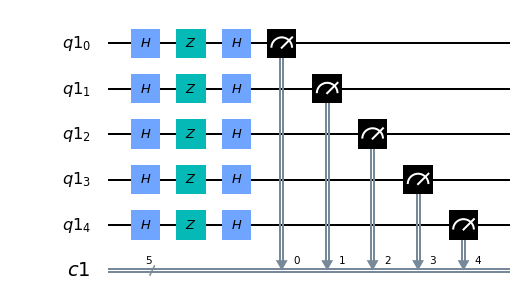

In [44]:
circuit.draw('mpl')

In [45]:
provider = IBMQ.get_provider(hub='ibm-q')
#device = provider.get_backend('ibmq_vigo')

In [8]:
FidelityFull1=[]
FidelityPartial1=[]
FidelityNoisy1=[]

JobIDFull1=[]
JobIDPartial1=[]
JobID_DJA1=[]

MatrixFull1=[]
MatrixPartial1=[]

In [10]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')
device = provider.get_backend('ibmq_burlington')
bit='11111'

for j in range (0,14):
    
    Trials=2**j  
    #Trials=8192
    
    job = execute(circuit, backend=device, shots=Trials)
    device_result = job.result()
    a=device_result.get_counts(circuit).get(bit)
    
    
    cal_job = execute(cal_circuits,
             backend=device,
             shots=Trials,
             optimization_level=0)
    #print(cal_job.job_id())

    cal_results = cal_job.result()

    index=2**n-1
    cal_job_partial = execute(cal_circuits[index],
             backend=device,
             shots=Trials,
             optimization_level=0)
    cal_results_partial = cal_job_partial.result()
    #JobIDPartial.append(cal_job_partial.job_id())
   
    meas_fitter = CompleteMeasFitter(cal_results, state_labels)
    meas_fitter_partial = CompleteMeasFitter(cal_results_partial, state_labels)
    for k in range (2**n-1):
        meas_fitter_partial.cal_matrix[k,k]=1
        
    
    meas_filter_partial =meas_fitter_partial.filter
    mitigated_result_partial = meas_filter_partial.apply(device_result)
    mitigated_counts_partial = mitigated_result_partial.get_counts(circuit)
    
    meas_filter =meas_fitter.filter
    mitigated_result = meas_filter.apply(device_result)
    mitigated_counts = mitigated_result.get_counts(circuit)
    
    FidelityNoisy1.append(device_result.get_counts(circuit).get(bit)/Trials)
    FidelityPartial1.append(mitigated_counts_partial.get(bit)/Trials)
    FidelityFull1.append(mitigated_counts.get(bit)/Trials)
    
    JobIDFull1.append("'"+str(cal_job.job_id())+"'")
    JobIDPartial1.append("'"+str(cal_job_partial.job_id())+"'")
    JobID_DJA1.append("'"+str(job.job_id())+"'")
    
    MatrixFull1.append(meas_fitter.cal_matrix)
    MatrixPartial1.append(meas_fitter_partial.cal_matrix)

In [11]:
def MatlabStr(array):
    return '[' + "; ".join(" ".join("%6g" % val for val in line) for line in array) + ']'

In [12]:
print(FidelityFull1)
print(FidelityPartial1)
print(FidelityNoisy1)

print(JobIDFull1)
print(JobIDPartial1)
print(JobID_DJA1)

print(MatrixFull1)
print(MatrixPartial1)

[0.026238200922399316, 0.023319254422566587, 0.015563969111807583, 0.41746967787508, 0.520340851547116, 0.8658373801945667, 0.7078128132550453, 0.9997611042348078, 0.9730451722767856, 1.0, 0.9999999999999771, 0.9921993178352472, 0.9988403841143982, 0.9469251263866674, 0.9953167293963074]
[0.01871104440536177, 1.0, 0.5000000008140761, 0.5000000000176336, 0.6428576932176069, 0.976047906294792, 0.7768671943010357, 1.0, 0.95904292554208, 0.9999999999997683, 0.9989680595660602, 0.9889482572608018, 0.8940462221631533, 0.9487343975220472, 0.9835377274806009]
[1.0, 1.0, 0.5, 0.5, 0.375, 0.75, 0.5625, 0.734375, 0.625, 0.65234375, 0.64453125, 0.6015625, 0.556640625, 0.63037109375, 0.6243896484375]
["'5f2b6b13f0563e001a6cbc3d'", "'5f2b6dfd5b470a00125d46dc'", "'5f2b6e2f0ca1ba0011b3d406'", "'5f2b6e640927b800133f988d'", "'5f2b6e970927b800133f988f'", "'5f2b6ec94ae7da001b374310'", "'5f2b6efd5b470a00125d46e8'", "'5f2b6f2f4ae7da001b374319'", "'5f2b6f64159e2600136cbdee'", "'5f2b6f9afa2efe001396140f'", "'

        5.24902344e-03, 2.39257812e-02, 2.13623047e-02, 6.22924805e-01]])]
[array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.33544922e-01]])]


# Here I put the full matrices

In [13]:
for j in MatrixFull1:
    print(MatlabStr(j))

[     1      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      0      0      0      0      0      0      0      0      0      0  

[     1      0    0.5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0    0.5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0    0.5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0    0.5      0      0      0    0.5      0      0      0      0      0      0      0    0.5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[ 0.875      0      0      0      0      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0   0.75      0  0.125      0  0.125      0  0.125      0      0      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0      0      0      0      0      0      0      0;  0.125      0  0.875  0.125      0      0  0.125      0      0      0      0      0      0      0      0      0      0      0  0.125      0      0      0  0.125      0      0      0      0      0      0      0      0      0;      0   0.25      0    0.5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0    0.5      0      0      0      0      0      0      0      0      0  

[ 0.875  0.125 0.0625 0.0625 0.03125      0 0.0625      0 0.0625      0      0      0      0      0      0      0 0.0625 0.03125      0      0      0      0      0      0      0      0      0      0      0      0      0      0; 0.0625 0.84375      0  0.125      0      0      0      0      0 0.0625      0      0      0      0      0 0.03125      0  0.125      0 0.03125      0      0      0 0.03125      0      0      0      0      0      0      0      0; 0.03125      0 0.90625 0.0625 0.03125      0 0.03125      0      0      0      0      0      0      0      0      0      0      0 0.03125      0      0      0      0      0      0      0      0      0      0      0      0      0;      0 0.03125      0  0.625 0.03125 0.0625      0 0.03125      0 0.03125      0 0.21875      0 0.03125 0.03125      0      0      0      0 0.03125      0      0      0 0.03125      0 0.03125      0      0      0      0      0      0;      0      0      0      0 0.6875 0.09375  0.125      0      0      0      0 

[ 0.875 0.179688 0.140625 0.015625 0.0703125 0.0078125 0.0078125      0 0.0390625 0.015625      0      0      0      0      0      0 0.046875      0      0 0.0078125 0.0078125      0      0      0      0      0      0      0      0      0      0      0; 0.0390625 0.734375      0 0.109375      0 0.0625      0      0      0 0.0234375 0.0078125 0.0078125      0 0.0078125      0      0      0 0.015625      0 0.0078125      0 0.0078125      0      0      0      0      0      0      0      0      0      0; 0.015625 0.0078125 0.742188 0.0859375 0.015625      0 0.0390625 0.015625      0      0 0.03125      0      0      0      0      0      0      0 0.0703125      0      0      0      0      0      0      0      0      0      0      0      0      0; 0.015625      0 0.0625 0.703125 0.0078125 0.0078125 0.015625 0.03125      0 0.015625 0.0078125 0.046875 0.015625      0 0.015625 0.015625      0 0.015625 0.015625 0.0390625 0.0078125 0.0078125      0 0.0078125 0.0078125 0.0078125      0 0.0078125 0

[0.896484 0.111328 0.146484 0.046875 0.0585938 0.015625 0.0136719 0.00390625 0.0742188 0.00976562 0.00390625 0.00195312 0.00195312      0      0      0 0.03125 0.0136719 0.00195312 0.00195312 0.00390625      0 0.00195312      0 0.0078125      0 0.00390625      0      0      0      0      0; 0.0234375 0.78125 0.00585938 0.15625 0.00195312 0.0429688 0.00195312 0.00585938 0.00390625 0.0507812      0 0.00390625      0 0.00976562      0      0 0.00195312 0.0449219      0 0.0136719      0 0.00195312      0      0      0 0.00585938      0      0      0      0      0      0; 0.0175781 0.00585938   0.75 0.0703125 0.0136719      0 0.0449219 0.00585938      0      0 0.0488281      0      0      0 0.00195312 0.00195312      0      0 0.03125 0.00390625 0.00195312      0 0.00390625 0.00195312      0      0 0.00390625      0      0      0      0      0; 0.00585938 0.0273438 0.0214844 0.673828      0 0.0078125 0.0078125 0.0625 0.00390625 0.00390625 0.00390625 0.0488281      0 0.00390625      0      0 


[0.875977 0.102539 0.149414 0.0361328 0.0615234 0.00488281 0.0136719 0.00195312 0.0419922 0.00195312 0.00683594 0.00292969 0.0078125      0 0.000976562      0 0.0419922 0.00390625 0.00195312 0.00390625 0.000976562      0      0      0 0.00585938 0.00195312      0      0 0.000976562      0 0.000976562      0; 0.0263672 0.78125 0.00488281  0.125 0.00292969 0.0527344      0 0.00976562 0.000976562 0.0498047 0.000976562 0.0146484      0 0.00390625      0 0.00292969 0.000976562 0.0341797 0.000976562 0.00878906      0 0.00390625      0 0.00292969      0 0.00390625      0 0.00195312      0 0.000976562      0      0; 0.0224609 0.000976562 0.735352 0.0673828 0.0117188 0.00390625 0.0449219 0.00878906      0      0 0.0507812 0.00585938      0 0.000976562 0.0078125 0.000976562 0.00292969      0 0.0361328 0.00488281 0.00292969      0 0.00292969      0      0      0 0.000976562 0.000976562      0      0      0 0.000976562; 0.00390625 0.0234375 0.0078125 0.664062 0.00488281 0.0195312 0.00292969 0.042

[0.800293 0.161133 0.154785 0.0551758 0.0507812 0.0126953 0.012207 0.00537109 0.0532227 0.0107422 0.00683594 0.00488281 0.00341797 0.000976562 0.000488281 0.000488281 0.0375977 0.0107422 0.0112305 0.00195312 0.00244141 0.000488281      0      0 0.00244141 0.00195312 0.000976562 0.000488281      0 0.000488281      0      0; 0.108398 0.724609 0.0175781 0.127441 0.00830078 0.0600586 0.00244141 0.00976562 0.00390625 0.0449219 0.00292969 0.0112305      0 0.00390625 0.000488281      0 0.00537109 0.0366211 0.000976562 0.00732422      0 0.00244141 0.000488281 0.000976562 0.000488281 0.00146484      0      0      0      0 0.000488281      0; 0.0180664 0.00927734 0.64502 0.135254 0.015625 0.00439453 0.0498047 0.0161133 0.00244141 0.000976562 0.0473633 0.0107422 0.00146484 0.000488281 0.00537109 0.000488281 0.00195312 0.000488281 0.0268555 0.00732422      0      0 0.00292969 0.000976562 0.000976562      0 0.00341797      0 0.000488281      0      0 0.000976562; 0.00878906 0.03125 0.0805664 0.5815


[0.859131 0.0917969 0.11084 0.0268555 0.0541992 0.0090332 0.00610352 0.00268555 0.0593262 0.0100098 0.00952148 0.00170898 0.00341797 0.00146484 0.000732422 0.000244141 0.0495605 0.00292969 0.00756836 0.00219727 0.00292969 0.000732422      0 0.000244141 0.00268555 0.000488281      0 0.000244141 0.000244141      0 0.000488281 0.000244141; 0.029541 0.797119 0.00585938 0.0998535 0.00146484 0.0522461 0.000732422 0.0078125 0.00292969 0.0559082 0.00146484 0.00585938 0.000976562 0.00537109 0.000976562      0 0.00170898 0.0366211 0.000732422 0.00561523 0.000244141 0.00170898      0      0      0 0.00366211      0 0.000732422 0.000244141 0.000488281 0.000244141 0.000244141; 0.0222168 0.00415039 0.760498 0.0661621 0.0144043 0.00170898 0.0507812 0.00634766 0.00268555 0.000732422 0.0507812 0.00366211 0.000488281 0.000488281 0.00219727 0.000732422 0.00146484 0.000488281 0.0373535 0.00439453 0.00146484 0.000488281 0.00292969      0 0.000488281      0 0.00268555 0.000488281 0.000244141      0 0.00024

[0.87146 0.109009 0.139282 0.029541 0.0499268 0.00512695 0.00622559 0.00231934 0.0635986 0.00744629 0.0118408 0.00476074 0.00488281 0.000732422 0.000854492 0.00012207 0.0411377 0.00366211 0.00585938 0.000854492 0.0020752 0.000366211 0.000488281      0 0.0032959 0.000244141 0.000732422 0.000488281 0.000488281      0 0.000244141      0; 0.0246582 0.798462 0.0078125 0.116943 0.00170898 0.0501709 0.000854492 0.00646973 0.00244141 0.0592041 0.000976562 0.00866699 0.000732422 0.00341797 0.000244141 0.000610352 0.000976562 0.0401611 0.000244141 0.00585938 0.000366211 0.00390625 0.00012207 0.000244141 0.00012207 0.00317383 0.000488281 0.000854492 0.00012207 0.000244141 0.000244141      0; 0.0233154 0.00390625 0.738525 0.0750732 0.0115967 0.00354004 0.0438232 0.00646973 0.00219727 0.000732422 0.0528564 0.00537109 0.00170898 0.000244141 0.00280762 0.00109863 0.0012207 0.000610352 0.0321045 0.0032959 0.00134277 0.00012207 0.00195312 0.000488281 0.000244141 0.00012207 0.00366211 0.000732422      0

# Here the partial

In [14]:
for j in MatrixPartial1:
    print(MatlabStr(j))

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.0078125;      0      0      0      0      1      0      0      0      0      0      0      0      0      

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.00390625;      0      0      0      0      1      0      0      0      0      0      0      0      0     

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.00195312;      0      0      0      0      1      0      0      0      0      0      0      0      0     

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.00012207;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.00183105;      0      0      0      0      1      0      0      0      0      0      0      0      0 

In [1]:
def stand7(w):
    if len(str(w))<9:
        return str(w)+(9-len(str(w)))*"0"  
    else:
        return str(w)[:9] 

def g7(ListMatr):
    logN=0
    for Matr in ListMatr:
        w=0
        for j in Matr:
            prnt=''
            for k in j:
                prnt=prnt+stand7(k)+" "
            if w==0:
                if logN==0:
                    prnt=prnt+"% N="+str(2**logN)+" shot"
                else:
                    prnt=prnt+"% N="+str(2**logN)+" shots"
            w=w+1
            print(prnt)
        logN=logN+1
        print('')

In [63]:
#Fulljob=["'5f2b6b13f0563e001a6cbc3d'", "'5f2b6dfd5b470a00125d46dc'", "'5f2b6e2f0ca1ba0011b3d406'", "'5f2b6e640927b800133f988d'", "'5f2b6e970927b800133f988f'", "'5f2b6ec94ae7da001b374310'", "'5f2b6efd5b470a00125d46e8'", "'5f2b6f2f4ae7da001b374319'", "'5f2b6f64159e2600136cbdee'", "'5f2b6f9afa2efe001396140f'", "'5f2b6fd49b21aa001a1caa3f'", "'5f2b70190ca1ba0011b3d41f'", "'5f2b70654ae7da001b37432a'", "'5f2b70cdfa2efe0013961422'", "'5f2b7169159e2600136cbe09'"]

Fulljob=["'5f2b6b259b21aa001a1caa0d'", "'5f2b6e0ef0563e001a6cbc65'", "'5f2b6e410927b800133f988a'", "'5f2b6e759b21aa001a1caa2f'", "'5f2b6ea90ca1ba0011b3d40e'", "'5f2b6edb9b21aa001a1caa32'", "'5f2b6f0ff0563e001a6cbc75'", "'5f2b6f420927b800133f9898'", "'5f2b6f78f0563e001a6cbc7f'", "'5f2b6fb0fa2efe0013961411'", "'5f2b6fef5b470a00125d46f2'", "'5f2b703dc79cc2001a3ac89a'", "'5f2b709d4ae7da001b37432e'", "'5f2b71295b470a00125d4705'", "'5f2b723d0927b800133f98c3'"]

Partialjob=["'5f2b6b259b21aa001a1caa0d'", "'5f2b6e0ef0563e001a6cbc65'", "'5f2b6e410927b800133f988a'", "'5f2b6e759b21aa001a1caa2f'", "'5f2b6ea90ca1ba0011b3d40e'", "'5f2b6edb9b21aa001a1caa32'", "'5f2b6f0ff0563e001a6cbc75'", "'5f2b6f420927b800133f9898'", "'5f2b6f78f0563e001a6cbc7f'", "'5f2b6fb0fa2efe0013961411'", "'5f2b6fef5b470a00125d46f2'", "'5f2b703dc79cc2001a3ac89a'", "'5f2b709d4ae7da001b37432e'", "'5f2b71295b470a00125d4705'", "'5f2b723d0927b800133f98c3'"]

In [64]:
len(Fulljob)

15

In [65]:
Fulljob[:14]

["'5f2b6b259b21aa001a1caa0d'",
 "'5f2b6e0ef0563e001a6cbc65'",
 "'5f2b6e410927b800133f988a'",
 "'5f2b6e759b21aa001a1caa2f'",
 "'5f2b6ea90ca1ba0011b3d40e'",
 "'5f2b6edb9b21aa001a1caa32'",
 "'5f2b6f0ff0563e001a6cbc75'",
 "'5f2b6f420927b800133f9898'",
 "'5f2b6f78f0563e001a6cbc7f'",
 "'5f2b6fb0fa2efe0013961411'",
 "'5f2b6fef5b470a00125d46f2'",
 "'5f2b703dc79cc2001a3ac89a'",
 "'5f2b709d4ae7da001b37432e'",
 "'5f2b71295b470a00125d4705'"]

In [13]:
Fulljob[0][1:len("'5f2b6b13f0563e001a6cbc3d'")-1]

'5f2b6b13f0563e001a6cbc3d'

In [10]:
'5f2b6b13f0563e001a6cbc3d'

'5f2b6b13f0563e001a6cbc3d'

In [11]:
print('5f2b6b13f0563e001a6cbc3d'=="'5f2b6b13f0563e001a6cbc3d'")

False


In [35]:
for k in Fulljob:
    print(k[1:len(k)-1]==)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [17]:
len("'5f2b6b13f0563e001a6cbc3d'")-len(Fulljob[0])

0

In [46]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')

In [47]:
backend=provider.get_backend('ibmq_burlington')
job = backend.retrieve_job('5f2b6b13f0563e001a6cbc3d')


In [32]:
print(Fulljob[0]=='5f2b6b13f0563e001a6cbc3d')

False


In [33]:
'5f2b6b13f0563e001a6cbc3d'

'5f2b6b13f0563e001a6cbc3d'

In [34]:
Fulljob[0][]

"'5f2b6b13f0563e001a6cbc3d'"

In [66]:
def stand7(w):
    if len(str(w))<9:
        return str(w)+(9-len(str(w)))*"0"  
    else:
        return str(w)[:9] 

def g7(ListMatr):
    logN=0
    for Matr in ListMatr:
        w=0
        for j in Matr:
            prnt=''
            for k in j:
                prnt=prnt+stand7(k)+" "
            if w==0:
                if logN==0:
                    prnt=prnt+"% N="+str(2**logN)+" shot"
                else:
                    prnt=prnt+"% N="+str(2**logN)+" shots"
            w=w+1
            print(prnt)
        logN=logN+1
        print('')

In [67]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')

In [ ]:
Fullmatr=[]
backend=provider.get_backend('ibmq_burlington')

for k in Fulljob[:14]:
    job = backend.retrieve_job(k[1:len(k)-1])
    fullp=job.result()
    meas_filter =meas_fitter.filter
    Fullmatr.append(meas_fitter.cal_matrix)

In [50]:
meas_fitter = CompleteMeasFitter(fullp, state_labels)

In [ ]:
    cal_job = execute(cal_circuits,
             backend=device,
             shots=Trials,
             optimization_level=0)
    #print(cal_job.job_id())

    cal_results = cal_job.result()

    index=2**n-1
    cal_job_partial = execute(cal_circuits[index],
             backend=device,
             shots=Trials,
             optimization_level=0)
    cal_results_partial = cal_job_partial.result()
    #JobIDPartial.append(cal_job_partial.job_id())
   
    meas_fitter = CompleteMeasFitter(cal_results, state_labels)
    meas_fitter_partial = CompleteMeasFitter(cal_results_partial, state_labels)
    for k in range (2**n-1):
        meas_fitter_partial.cal_matrix[k,k]=1
        
    
    meas_filter_partial =meas_fitter_partial.filter
    
    meas_filter =meas_fitter.filter
    
        
    MatrixFull1.append(meas_fitter.cal_matrix)
    MatrixPartial1.append(meas_fitter_partial.cal_matrix)
